<a href="https://colab.research.google.com/github/Douglas-1983/Challenge_TeleconX/blob/main/Challenge_TeleconX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bliblioteca e base de dados

In [1]:
import pandas as pd

dados = pd.read_json('/content/TelecomX_Data.json')
dados.head()
list_of_records = dados.to_dict('records')
dados = pd.json_normalize(list_of_records)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Criando e guardando lista com os nomes das colunas

In [2]:
colunas = list(dados.columns)
colunas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

Identificando o tipo dos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Descobrindo o numero de linhas e colunas da nossa base

In [4]:
dados.shape

(7267, 21)

In [5]:
import numpy as np


Tratando e convertendo os tipos de dados (Dtypes)

In [6]:
dados['account.Charges.Total'] = dados['account.Charges.Total'].replace(' ', np.nan)
dados['account.Charges.Total']= dados['account.Charges.Total'].astype(np.float64)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
colunas_categoricas = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

for coluna in colunas_categoricas:
    dados[coluna] = dados[coluna].astype('category')


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7267 non-null   category
 2   customer.gender            7267 non-null   category
 3   customer.SeniorCitizen     7267 non-null   int64   
 4   customer.Partner           7267 non-null   category
 5   customer.Dependents        7267 non-null   category
 6   customer.tenure            7267 non-null   int64   
 7   phone.PhoneService         7267 non-null   category
 8   phone.MultipleLines        7267 non-null   category
 9   internet.InternetService   7267 non-null   category
 10  internet.OnlineSecurity    7267 non-null   category
 11  internet.OnlineBackup      7267 non-null   category
 12  internet.DeviceProtection  7267 non-null   category
 13  internet.TechSupport       7267 n

In [10]:
print(dados.dtypes)

customerID                     object
Churn                        category
customer.gender              category
customer.SeniorCitizen          int64
customer.Partner             category
customer.Dependents          category
customer.tenure                 int64
phone.PhoneService           category
phone.MultipleLines          category
internet.InternetService     category
internet.OnlineSecurity      category
internet.OnlineBackup        category
internet.DeviceProtection    category
internet.TechSupport         category
internet.StreamingTV         category
internet.StreamingMovies     category
account.Contract             category
account.PaperlessBilling     category
account.PaymentMethod        category
account.Charges.Monthly       float64
account.Charges.Total         float64
dtype: object


In [11]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Gerando base tratada em formato CSV

In [12]:
dados.to_csv('dados_tratados.csv')

In [13]:
dados.columns = [
    'ID_cliente', 'Cancelamento', 'Genero', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
    'Tempo_de_contrato', 'Telefone_Ativo', 'Multiplas_Linhas',
    'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
    'Fatura_Digital', 'Metodo_Pagamento', 'Valor_Mensal', 'Valor_Total'
]


In [14]:
dados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Verificando e tratando valores nulos

In [15]:

print(dados.isnull().sum())


ID_cliente               0
Cancelamento             0
Genero                   0
Idoso                    0
Tem_Conjuge              0
Tem_Dependentes          0
Tempo_de_contrato        0
Telefone_Ativo           0
Multiplas_Linhas         0
Tipo_Internet            0
Seguranca_Online         0
Backup_Online            0
Protecao_Dispositivo     0
Suporte_Tecnico          0
Streaming_TV             0
Streaming_Filmes         0
Tipo_Contrato            0
Fatura_Digital           0
Metodo_Pagamento         0
Valor_Mensal             0
Valor_Total             11
dtype: int64


In [16]:
print(dados[dados.isnull().any(axis=1)])

      ID_cliente Cancelamento  Genero  Idoso Tem_Conjuge Tem_Dependentes  \
975   1371-DWPAZ           No  Female      0         Yes             Yes   
1775  2520-SGTTA           No  Female      0         Yes             Yes   
1955  2775-SEFEE           No    Male      0          No             Yes   
2075  2923-ARZLG           No    Male      0         Yes             Yes   
2232  3115-CZMZD           No    Male      0          No             Yes   
2308  3213-VVOLG           No    Male      0         Yes             Yes   
2930  4075-WKNIU           No  Female      0         Yes             Yes   
3134  4367-NUYAO           No    Male      0         Yes             Yes   
3203  4472-LVYGI           No  Female      0         Yes             Yes   
4169  5709-LVOEQ           No  Female      0         Yes             Yes   
5599  7644-OMVMY           No    Male      0         Yes             Yes   

      Tempo_de_contrato Telefone_Ativo  Multiplas_Linhas Tipo_Internet  ...  \
975     

In [17]:
dados['Valor_Total']=dados['Valor_Total'].fillna('0.0')

In [18]:
print(dados.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


In [19]:
dados.to_json('dados_tratados.json')

In [20]:
import pandas as pd

dados_normalizados = pd.read_json('/content/dados_tratados.json')

In [21]:
print(dados_normalizados.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


Normalizando o titulo das colunas (Padronizando para minuscula)

In [22]:
dados_normalizados.columns = dados_normalizados.columns.str.lower()

In [23]:
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [24]:
dados_normalizados['contas_diarias']= dados_normalizados['valor_mensal'] / 30
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [25]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   cancelamento          7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   tem_conjuge           7267 non-null   object 
 5   tem_dependentes       7267 non-null   object 
 6   tempo_de_contrato     7267 non-null   int64  
 7   telefone_ativo        7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   tipo_internet         7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes      7267

Padronização de dados

In [26]:
dados_normalizados[['contas_diarias','valor_total']]= dados_normalizados[['contas_diarias','valor_total']].round(1)
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.8


In [27]:
colunas_binarias = ['cancelamento', 'telefone_ativo', 'multiplas_linhas', 'idoso', 'tem_conjuge', 'tem_dependentes',
                    'fatura_digital', 'protecao_dispositivo','suporte_tecnico', 'streaming_filmes', 'streaming_tv']
dados_normalizados[colunas_binarias] = dados_normalizados[colunas_binarias].replace({'Yes': 1, 'No': 0})
dados_normalizados.head()


/tmp/ipython-input-27-3738907124.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[colunas_binarias] = dados_normalizados[colunas_binarias].replace({'Yes': 1, 'No': 0})


,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.8


In [28]:
dados_normalizados['tipo_contrato'] = dados_normalizados['tipo_contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Fidelidade_12_meses', 'Two year': 'Fidelidade_24_meses'})
dados_normalizados['metodo_pagamento'] = dados_normalizados['metodo_pagamento'].replace({'Electronic check': 'Cheque_Eletronico', 'Mailed check': 'Cheque_Postado', 'Bank transfer (automatic)': 'Transferencia_Bancaria_Automática', 'Credit card (automatic)': 'Cartao_Credito_Automático'})
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [29]:
dados_normalizados['tipo_internet'] = dados_normalizados['tipo_internet'].replace({'Fiber optic': 'Fibra_Optica', 'DSL': 'Linha_telefonica', 'No': 'Sem_internet'})
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [30]:
dados_normalizados['genero']= dados_normalizados['genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
dados_normalizados.head()

,id_cliente,cancelamento,genero,idoso,tem_conjuge,tem_dependentes,tempo_de_contrato,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


Calculando a média

In [31]:
dados_normalizados.mean(numeric_only=True).round(2)

,0
idoso,0.16
tem_conjuge,0.48
tem_dependentes,0.30
tempo_de_contrato,32.35
telefone_ativo,0.90
fatura_digital,0.59
valor_mensal,64.72
valor_total,2277.18
contas_diarias,2.16


Calculando a Mediana

In [32]:
dados_normalizados.median(numeric_only=True)

,0
idoso,0.0
tem_conjuge,0.0
tem_dependentes,0.0
tempo_de_contrato,29.0
telefone_ativo,1.0
fatura_digital,1.0
valor_mensal,70.3
valor_total,1389.2
contas_diarias,2.3


In [33]:
dados_normalizados.std(numeric_only=True).round(2)

,0
idoso,0.37
tem_conjuge,0.50
tem_dependentes,0.46
tempo_de_contrato,24.57
telefone_ativo,0.30
fatura_digital,0.49
valor_mensal,30.13
valor_total,2268.65
contas_diarias,1.00


In [34]:
print(dados_normalizados['genero'].value_counts())

genero
Masculino    3675
Feminino     3592
Name: count, dtype: int64


In [35]:
print(dados_normalizados['tipo_internet'].value_counts())

tipo_internet
Fibra_Optica        3198
Linha_telefonica    2488
Sem_internet        1581
Name: count, dtype: int64


In [36]:
print(dados_normalizados['tipo_contrato'].value_counts())

tipo_contrato
Mensal                 4005
Fidelidade_24_meses    1743
Fidelidade_12_meses    1519
Name: count, dtype: int64


In [37]:
print(dados_normalizados['metodo_pagamento'].value_counts())

metodo_pagamento
Cheque_Eletronico                    2445
Cheque_Postado                       1665
Transferencia_Bancaria_Automática    1589
Cartao_Credito_Automático            1568
Name: count, dtype: int64


In [41]:
print(dados_normalizados['cancelamento'].unique())

[0 1 '']


In [42]:
dados_normalizados['cancelamento'] = dados_normalizados['cancelamento'].replace({0: 'Não', 1: 'Sim', '': 'Desconhecido'})

In [48]:
dados_normalizados['cancelamento'].value_counts()



,count
cancelamento,
Não,5174
Sim,1869
Desconhecido,224


In [68]:
dados_filtrados = dados_normalizados[
    dados_normalizados['cancelamento'].notna() &
    (dados_normalizados['cancelamento'].astype(str).str.strip() != '') &
    (dados_normalizados['cancelamento'].astype(str).str.strip() != '0')
]


/tmp/ipython-input-70-683920401.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




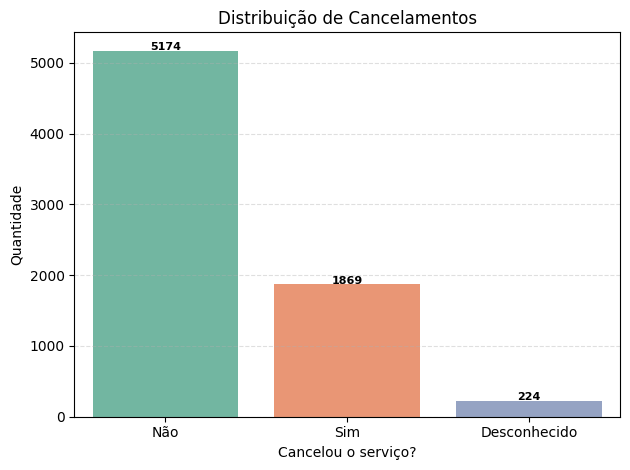

In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'cancelamento': ['Não', 'Sim', 'Desconhecido'],
    'count': [5174, 1869, 224]
})


ax = sns.barplot(data=df, x='cancelamento', y='count', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 50, f'{int(altura)}',
            ha='center', va='center', fontsize=8, fontweight='bold')
plt.title('Distribuição de Cancelamentos')
plt.xlabel('Cancelou o serviço?')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [71]:
dados_filtrados = dados_normalizados[
    dados_normalizados['tipo_contrato'].notna() &
    (dados_normalizados['tipo_contrato'].astype(str).str.strip() != '') &
    (dados_normalizados['tipo_contrato'].astype(str).str.strip() != '0')
]


In [73]:
dados_filtrados = dados_normalizados[
    dados_normalizados['genero'].notna() &
    (dados_normalizados['genero'].astype(str).str.strip() != '') &
    (dados_normalizados['genero'].astype(str).str.strip() != '0')
]


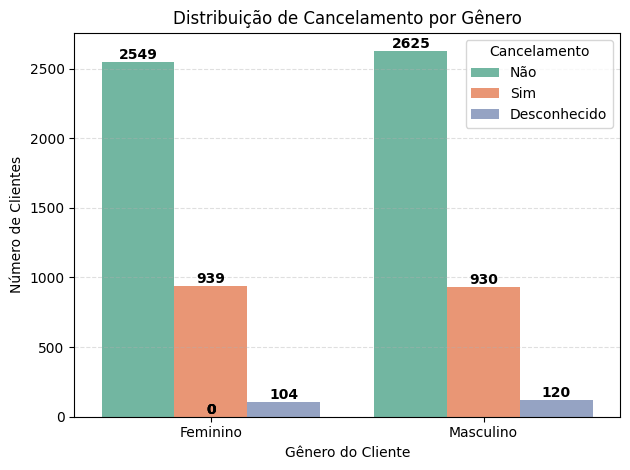

In [74]:
ax = sns.countplot(data=dados_normalizados, x='genero', hue='cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 50, f'{int(altura)}',
            ha='center', va='center', fontsize=10, fontweight='bold')
plt.title('Distribuição de Cancelamento por Gênero')
plt.xlabel('Gênero do Cliente')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelamento')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [63]:
dados_filtrados = dados_normalizados[dados_normalizados['tipo_contrato'].notnull()]
dados_filtrados = dados_filtrados[dados_filtrados['tipo_contrato'].str.strip() != '']


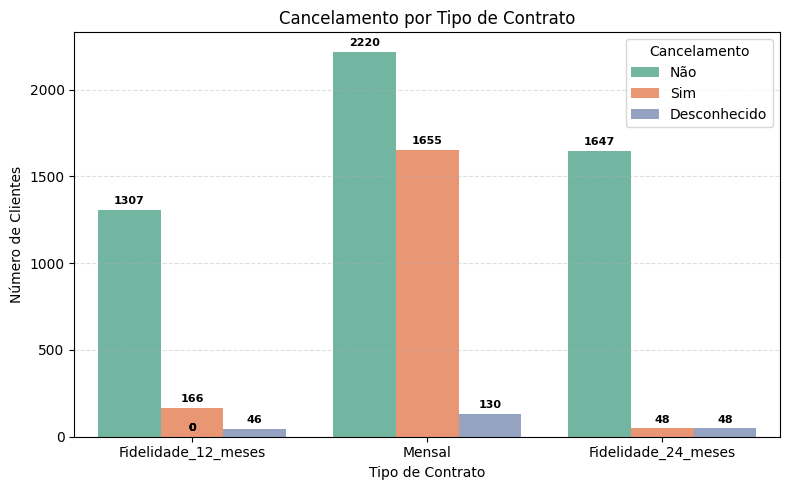

In [64]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=dados_filtrados, x='tipo_contrato', hue='cancelamento', palette='Set2')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 50, f'{int(altura)}',
            ha='center', va='center', fontsize=8, fontweight='bold')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelamento')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [65]:
import plotly.express as px

df_plot = dados_normalizados.groupby(['tipo_contrato', 'cancelamento']).size().reset_index(name='quantidade')

fig = px.bar(df_plot,
             x='tipo_contrato',
             y='quantidade',
             color='cancelamento',
             barmode='group',
             text='quantidade',
             labels={
                 'tipo_contrato': 'Tipo de Contrato',
                 'quantidade': 'Número de Clientes',
                 'cancelamento': 'Cancelamento'
             },
             title='Cancelamento por Tipo de Contrato')

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Tipo de Contrato',
                  yaxis_title='Número de Clientes',
                  legend_title='Cancelamento',
                  bargap=0.2)

fig.show()


In [81]:
cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']


In [82]:
contagem_idosos = cancelados['idoso'].value_counts()
print(contagem_idosos)


idoso
Não    1393
Sim     476
Name: count, dtype: int64


CONTAGEM DE EVASÃO PÓR VARIAVEIS CATEGÓRICAS

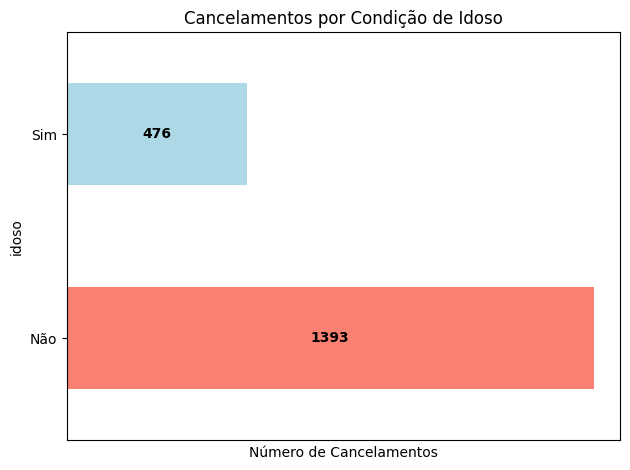

In [119]:

  import matplotlib.pyplot as plt

ax = contagem_idosos.plot.barh(color=['salmon', 'lightblue'])
ax.set_xticks([])

for i, valor in enumerate(contagem_idosos):
    ax.text(valor / 2, i, str(valor),
            ha='center', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por Condição de Idoso')
plt.xlabel('Número de Cancelamentos')
plt.tight_layout()
plt.show()





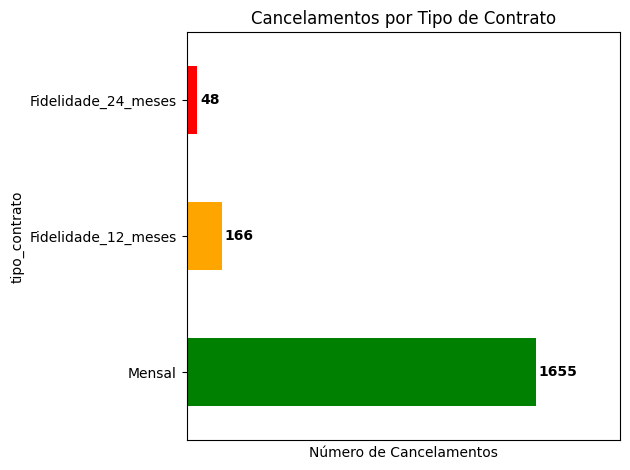

In [124]:
import matplotlib.pyplot as plt

cores = ['green', 'orange', 'red']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['tipo_contrato'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 400)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por Tipo de Contrato')
plt.xlabel('Número de Cancelamentos')
plt.tight_layout()
plt.show()


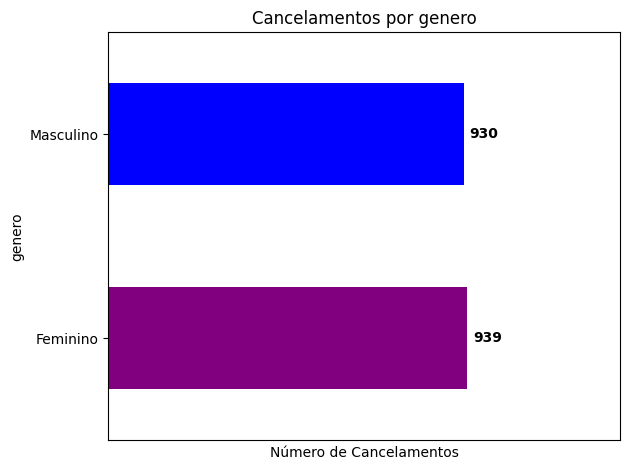

In [121]:
cores = ['purple', 'blue']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['genero'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 400)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por genero')
plt.xlabel('Número de Cancelamentos')
plt.tight_layout()
plt.show()

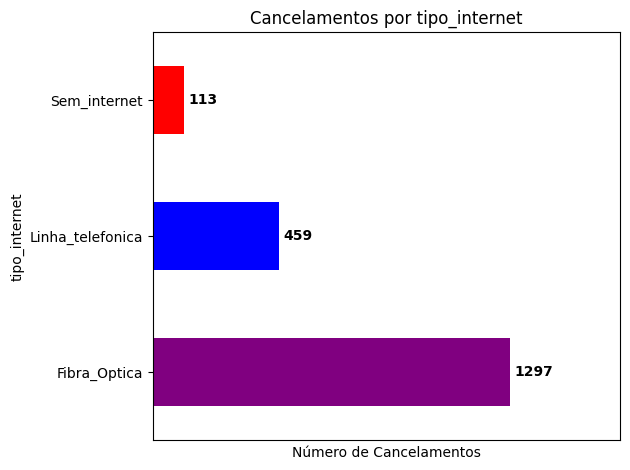

In [126]:
cores = ['purple', 'blue', 'red']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['tipo_internet'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 400)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por tipo_internet')
plt.xlabel('Número de Cancelamentos')
plt.tight_layout()
plt.show()

In [127]:
dados_normalizados['tem_conjuge'] = dados_normalizados['tem_conjuge'].replace({0: 'Não', 1: 'Sim', '': 'Desconhecido'})

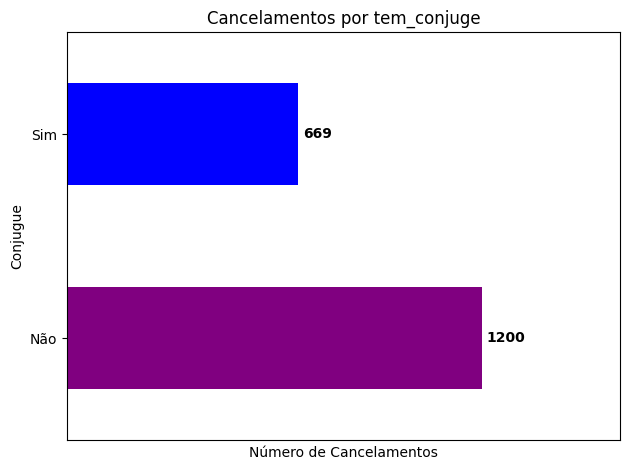

In [195]:
cores = ['purple', 'blue']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['tem_conjuge'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 400)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por tem_conjuge')
plt.xlabel('Número de Cancelamentos')
plt.ylabel('Conjugue')
plt.tight_layout()
plt.show()

In [130]:
dados_normalizados['tem_dependentes'] = dados_normalizados['tem_dependentes'].replace({0: 'Não', 1: 'Sim', '': 'Desconhecido'})

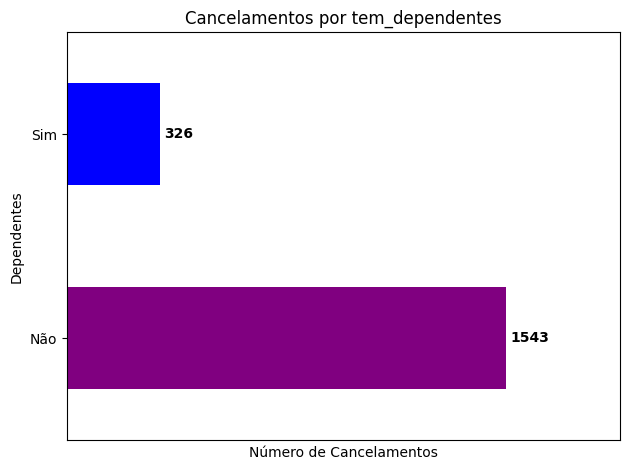

In [194]:
cores = ['purple', 'blue']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['tem_dependentes'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 400)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por tem_dependentes')
plt.xlabel('Número de Cancelamentos')
plt.ylabel('Dependentes')
plt.tight_layout()
plt.show()

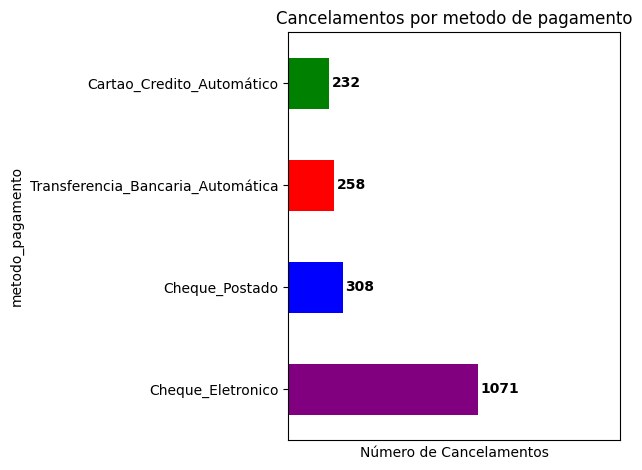

In [198]:
cores = ['purple', 'blue', 'red', 'green']

cancelados = dados_normalizados[dados_normalizados['cancelamento'] == 'Sim']

contagem_contrato = cancelados['metodo_pagamento'].value_counts()


ax = contagem_contrato.plot.barh(color=cores)
ax.set_xlim(0, contagem_contrato.max() + 800)
ax.set_xticks([])

for i, valor in enumerate(contagem_contrato):
    ax.text(valor +15, i, str(valor),
            ha='left', va='center', color='black', fontweight='bold')

plt.title('Cancelamentos por metodo de pagamento')
plt.xlabel('Número de Cancelamentos')
plt.tight_layout()
plt.show()

CONTAGEM DE EVASÃO POR VARIÁVEIS NUMÉRICAS

In [201]:
dados.columns = [
    'ID_cliente', 'Cancelamento', 'Genero', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
    'Tempo_de_contrato', 'Telefone_Ativo', 'Multiplas_Linhas',
    'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
    'Fatura_Digital', 'Metodo_Pagamento', 'Valor_Mensal', 'Valor_Total'
]

In [202]:
dados_normalizados.columns = dados_normalizados.columns.str.lower()

/tmp/ipython-input-207-325786863.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




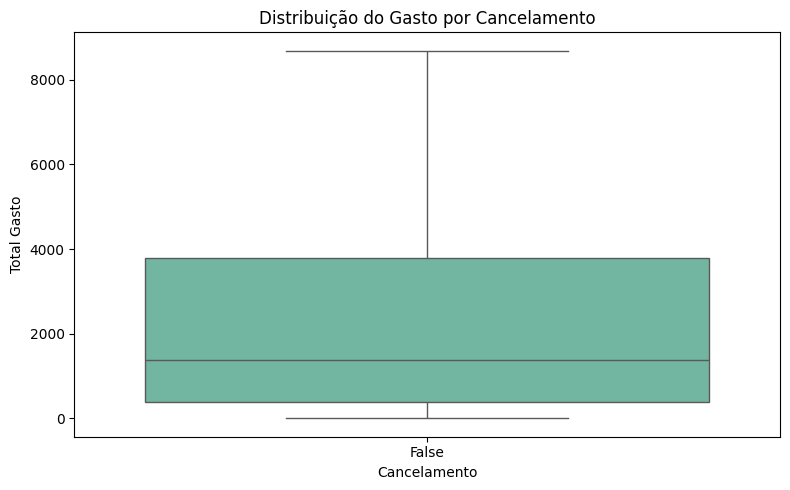

In [207]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_normalizados, x='cancelamento'=='sim', y='valor_total', palette='Set2') # Changed to lowercase column names

plt.title('Distribuição do Gasto por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Total Gasto')
plt.tight_layout()
plt.show()

/tmp/ipython-input-209-3509336136.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




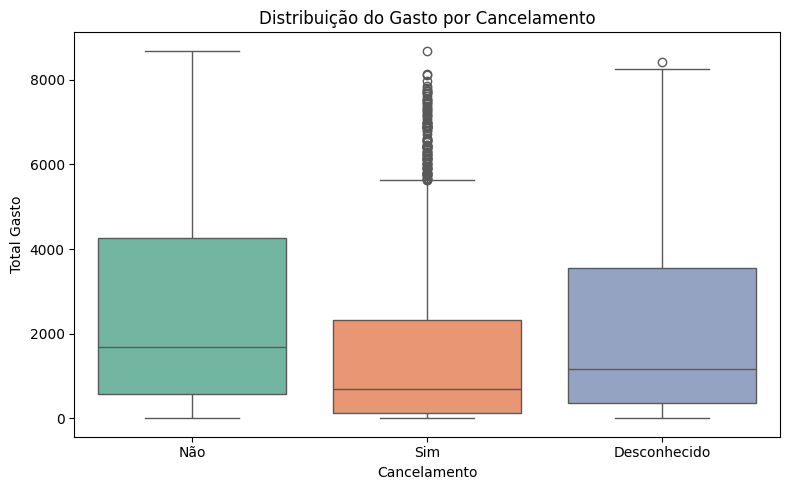

In [209]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_normalizados, x='cancelamento', y='valor_total', palette='Set2')

plt.title('Distribuição do Gasto por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Total Gasto')
plt.tight_layout()
plt.show()

Index(['id_cliente', 'cancelamento', 'genero', 'idoso', 'tem_conjuge',
       'tem_dependentes', 'tempo_de_contrato', 'telefone_ativo',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'valor_total', 'contas_diarias'],
      dtype='object')


/tmp/ipython-input-226-1566102915.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




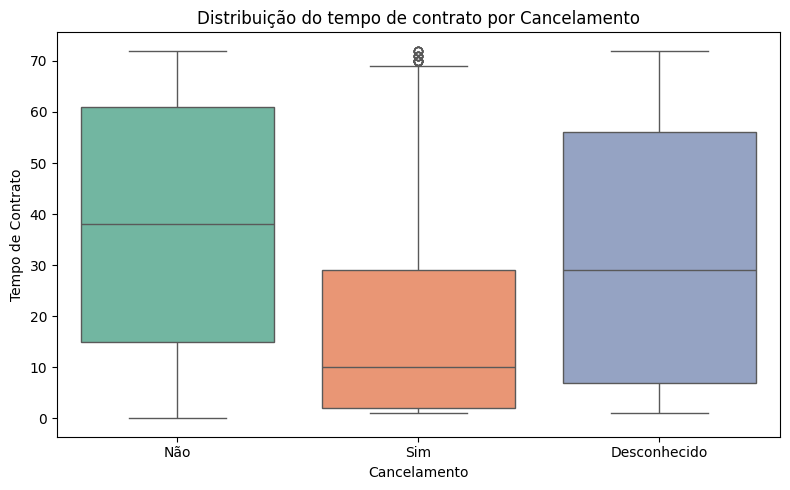

In [226]:
plt.figure(figsize=(8, 5))
print(dados_normalizados.columns)
sns.boxplot(data=dados_normalizados, x='cancelamento', y='tempo_de_contrato', palette='Set2')

plt.title('Distribuição do tempo de contrato por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Tempo de Contrato')
plt.tight_layout()
plt.show()

RELATÓRIO FINAL

*   Introdução:

O objetivo deste trabalho é analisar o churn de clientes da empresa TelecomX. A partir de uma base de dados, irei tratar os dados e gerar insights que ajudam a explicar o churn.


*   Limpeza e tratamento de dados:

Iniciei com a importação da base de dados acessando o github, acessando a base e salvando em extensão .Json. Após salvar os dados, iniciei o google colab e fiz o upload do arquivo. importando a bliblioteca pandas e criei o dataframe dados. A seguir, vou listar os principais passos para tratamento dos dados:
1- Criando e guardando lista com os nomes das colunas;
2- Identificando e convertendo os tipos de dados (Dtypes);
3- dados.shape para descobrir o número de linhas e colunas do dataframe;
4- Verifiquei e tratei valores nulos;
5- criei uma base de dados tratada através do comando dados.to_json('dados_tratados.json');
6- a partir da base de dados tartadas, crei um novo DF que chamei de dados_normalizados e fiz a normalização e padronização dos dados;


*   Análise exploratória de dados

1- Calculei a média, mediana e desvio padrão dos campos indicados;
2- também fiz a contagem de alguns valores com o comando print;
3- utilizei as bibliotecas Seaborn e matplotlib para criar análises descritivas através de graficos de distribuição de evasão por variaveis categóricas e variáveis numéricas.

*   Conclusão e Insights

Dos 1869 cancelamentos, apenas 25% eram de clientes idosos;
Dos 1869 cancelamentos, 88% eram de clientes com contratos mensais (sem fidelidade)
Dos 1869 cancelamentos, 50% eram de mulheres e 50% de homens
69% dos cancelamentos eram de clientes com internet tipo fibra optica;
64% dos cancelamentos eram de clientes solteiros(as)
82% dos cancelamentos eram de clientes que não possuíam dependentes;
O meio de pagamento mais representativo entre os cancelamentos é o Cheque_eletronico (59% dos cancelamentos)

*   Recomendações

Com base nos dados análisados e visando diminuir o número de cancelamentos, recomendo:
- Trabalhar com ofertas e valores mais atrativos para planos com fidelidade;
- Fomentar clientes da categoria de idosos, planos familiares (dependentes e conjuges) pois são mais fieis;
- trabalhar e oferecer descontos para quem tiver meio de pagemento diferente de cheque_eletronico.





import matplotlib.pyplot as plt
import seaborn as sns


dados_cancelados = dados_filtrados[dados_filtrados['cancelamento'] == 'Sim']

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=dados_cancelados, x='tempo_de_contrato', palette='Set2')  



for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 10, f'{int(altura)}',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title('Cancelamentos (Sim) por Tempo de Contrato')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
